# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R 2023Fall: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## Demo 1: Setup dependencies

In [ ]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs269'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs269'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs260R'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

In [ ]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


In [ ]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
# ax.annotate("REF-DELETE-IT", (ax.get_xlim()[1] / 10, ax.get_ylim()[0]), size=50, alpha=0.05)

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


In [4]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]

animate(frames)

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))





environment_num is deprecated. Use num_scenarios instead!
environment_num is deprecated. Use num_scenarios instead!


Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from /home/acthegreat/work/actor critic with summarization/MetaDrive-Tut-Hard-v0/ppo/checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.170
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 89.320
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 126.613
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 162.372
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 222.568
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 265.012
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 286.169
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 334.812
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 373.258


PPO agent achieves 389.59330982887735 return in MetaDrive Hard environment.


In [9]:
# path = "./test.gif"
# import PIL
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=0.00001,
#     loop=0
# )

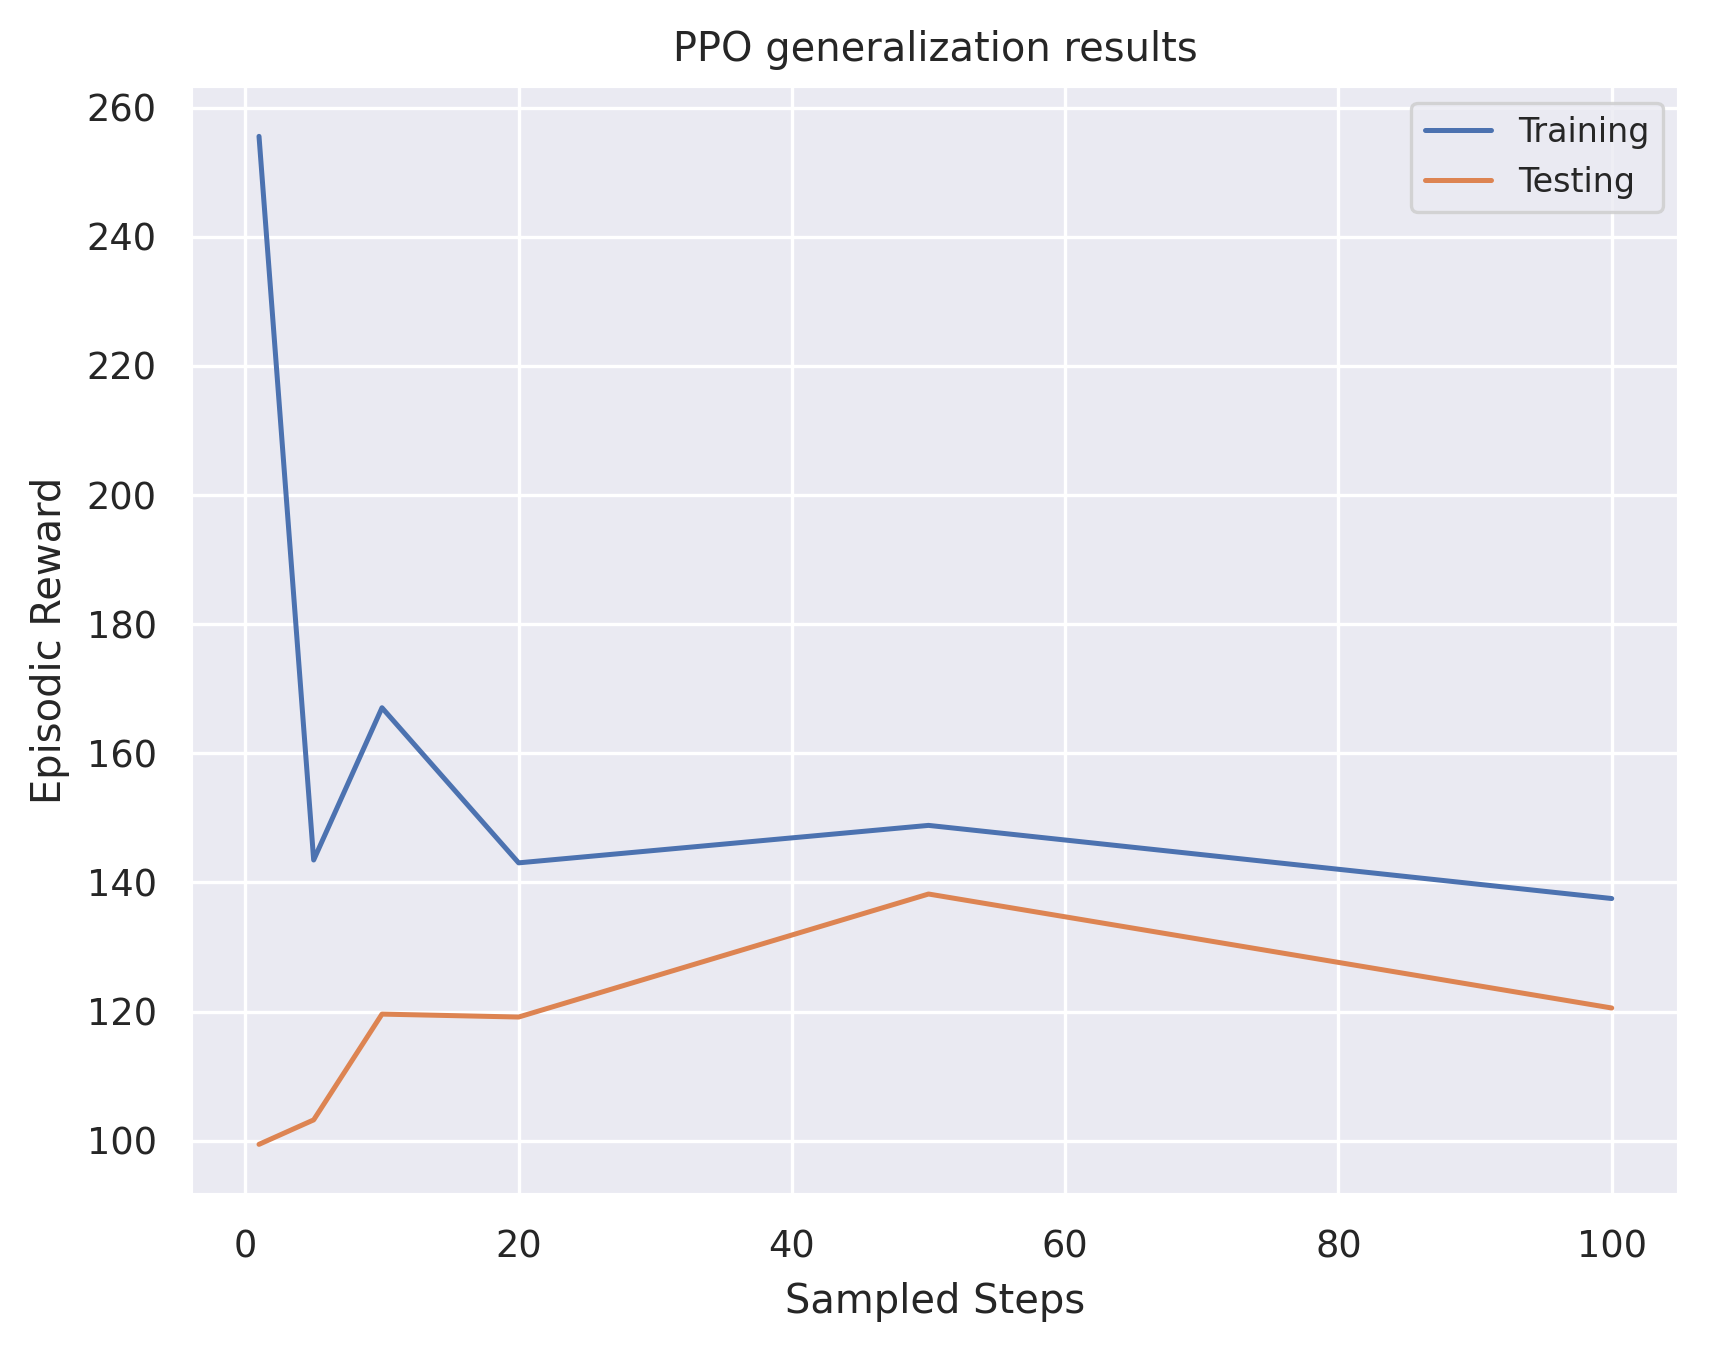

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("PPO generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")

plt.savefig('generalization_ppo.png', format='png', dpi=300, bbox_inches="tight")


# Note: The following figure is for reference used only, you don't need to repreduce it.

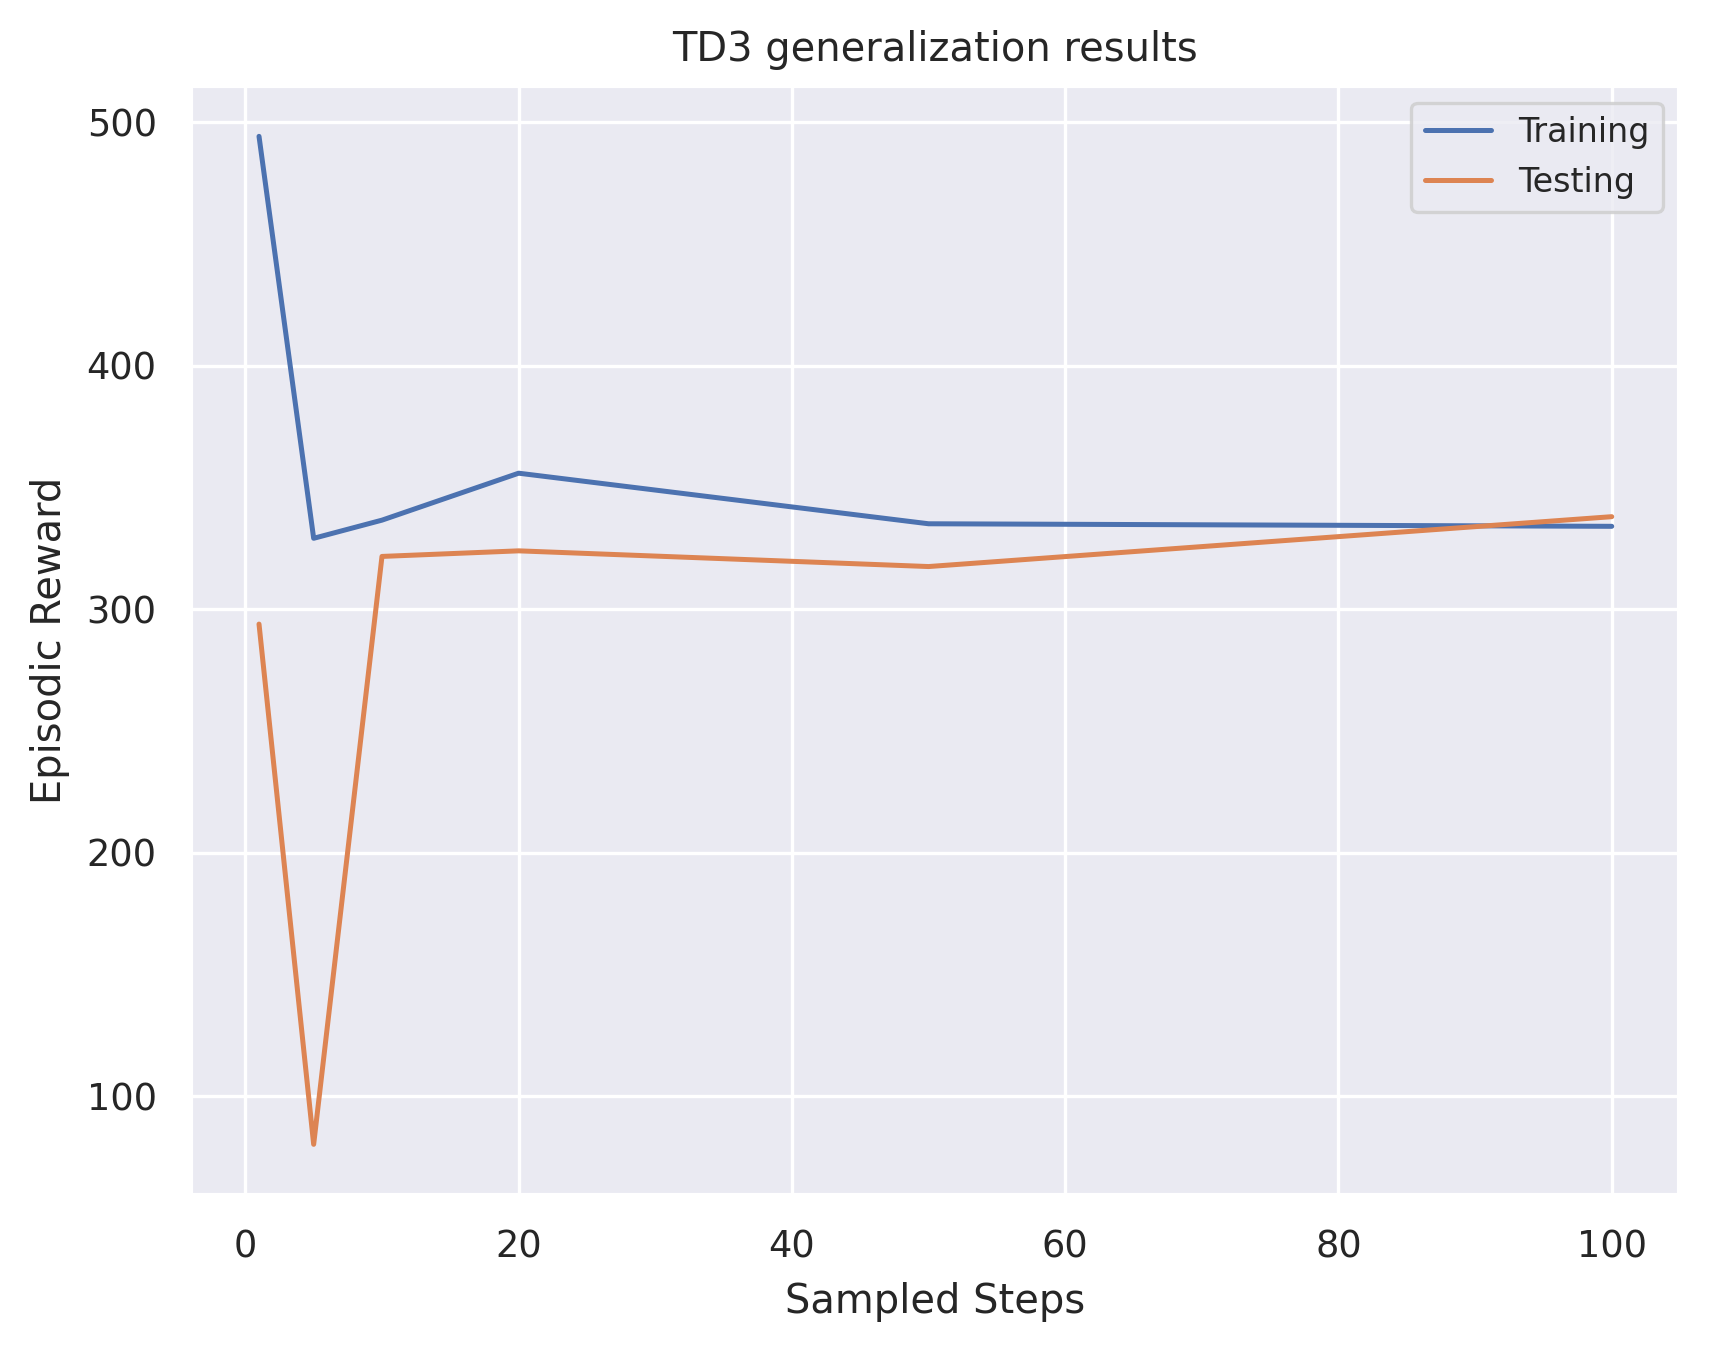

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("TD3 generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")

plt.savefig('generalization-td3.png', format='png', dpi=300, bbox_inches="tight")


# Note: The following figure is for reference used only, you don't need to repreduce it.

In [ ]:
!python eval_gail.py --log-dir MetaDrive-Tut-Easy-v0/gail --num-envs 2 --num-episodes 5